# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [3]:
pima_df = pd.read_csv('pima-indians-diabetes.data', names=colnames)
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [4]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
print(pima_df.info())
print('pima_df.shape - ', pima_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
pima_df.shape -  (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

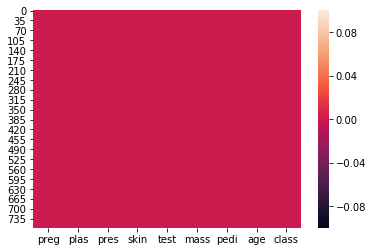

In [6]:
sns.heatmap(pima_df.isnull())

In [7]:
'''
PregnanciesNumber of times pregnant - zero
GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test - nonzero
BloodPressureDiastolic blood pressure (mm Hg) - nonzero
SkinThicknessTriceps skin fold thickness (mm) - nonzero
Insulin2-Hour serum insulin (mu U/ml) - nonzero
BMIBody mass index (weight in kg/(height in m)^2) - nonzero
DiabetesPedigreeFunctionDiabetes pedigree function - zero
AgeAge (years) - nonzero
OutcomeClass variable (0 or 1) - zero'''
#pima_df[pima_df['plas']==0]
#pima_df_plas_nz = pima_df[pima_df['plas']==0]['plas'].replace(to_replace=0,value=pima_df['plas'].median())
#pima_df_plas_nz

'\nPregnanciesNumber of times pregnant - zero\nGlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test - nonzero\nBloodPressureDiastolic blood pressure (mm Hg) - nonzero\nSkinThicknessTriceps skin fold thickness (mm) - nonzero\nInsulin2-Hour serum insulin (mu U/ml) - nonzero\nBMIBody mass index (weight in kg/(height in m)^2) - nonzero\nDiabetesPedigreeFunctionDiabetes pedigree function - zero\nAgeAge (years) - nonzero\nOutcomeClass variable (0 or 1) - zero'

In [8]:
'''
pima_df['plas_nz'] = pima_df['plas'].replace(to_replace=0,value=pima_df['plas'].median())
pima_df['pres_nz'] = pima_df['pres'].replace(to_replace=0,value=pima_df['pres'].median())
pima_df['skin_nz'] = pima_df['skin'].replace(to_replace=0,value=pima_df['skin'].median())
pima_df['test_nz'] = pima_df['test'].replace(to_replace=0,value=pima_df['test'].median())
pima_df['mass_nz'] = pima_df['mass'].replace(to_replace=0,value=pima_df['mass'].median())
pima_df['age_nz'] = pima_df['age'].replace(to_replace=0,value=pima_df['age'].median())
'''

"\npima_df['plas_nz'] = pima_df['plas'].replace(to_replace=0,value=pima_df['plas'].median())\npima_df['pres_nz'] = pima_df['pres'].replace(to_replace=0,value=pima_df['pres'].median())\npima_df['skin_nz'] = pima_df['skin'].replace(to_replace=0,value=pima_df['skin'].median())\npima_df['test_nz'] = pima_df['test'].replace(to_replace=0,value=pima_df['test'].median())\npima_df['mass_nz'] = pima_df['mass'].replace(to_replace=0,value=pima_df['mass'].median())\npima_df['age_nz'] = pima_df['age'].replace(to_replace=0,value=pima_df['age'].median())\n"

In [9]:
columns_nz={'plas','pres','skin','test','mass','age'}
for column in columns_nz:
    pima_df[column]=pima_df[column].replace(to_replace=0,value=pima_df[column].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [10]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
pima_df.shape

(768, 9)

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

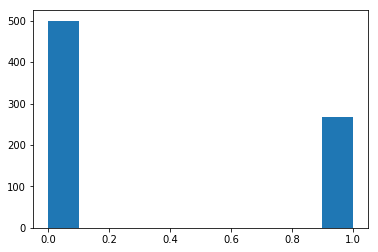

In [49]:
plt.hist(pima_df['class'])

In [45]:
#Check for skewness
stats.skew(pima_df['class'])
stats.skewtest(pima_df['class'])

SkewtestResult(statistic=6.671974201929662, pvalue=2.523849434351008e-11)

In [46]:
#Check for kurtosis
stats.kurtosis(pima_df['class'])
stats.kurtosistest(pima_df['class'])

KurtosistestResult(statistic=0.0, pvalue=1.0)

((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

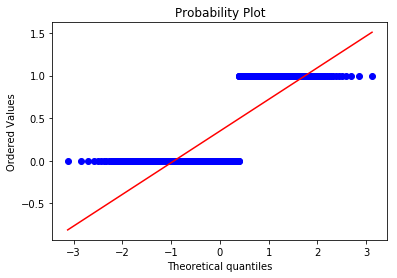

In [19]:
#Q-Q plot to check for normal distribution
stats.probplot(pima_df['class'],plot=plt)

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


/Users/sesankaran/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/sesankaran/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


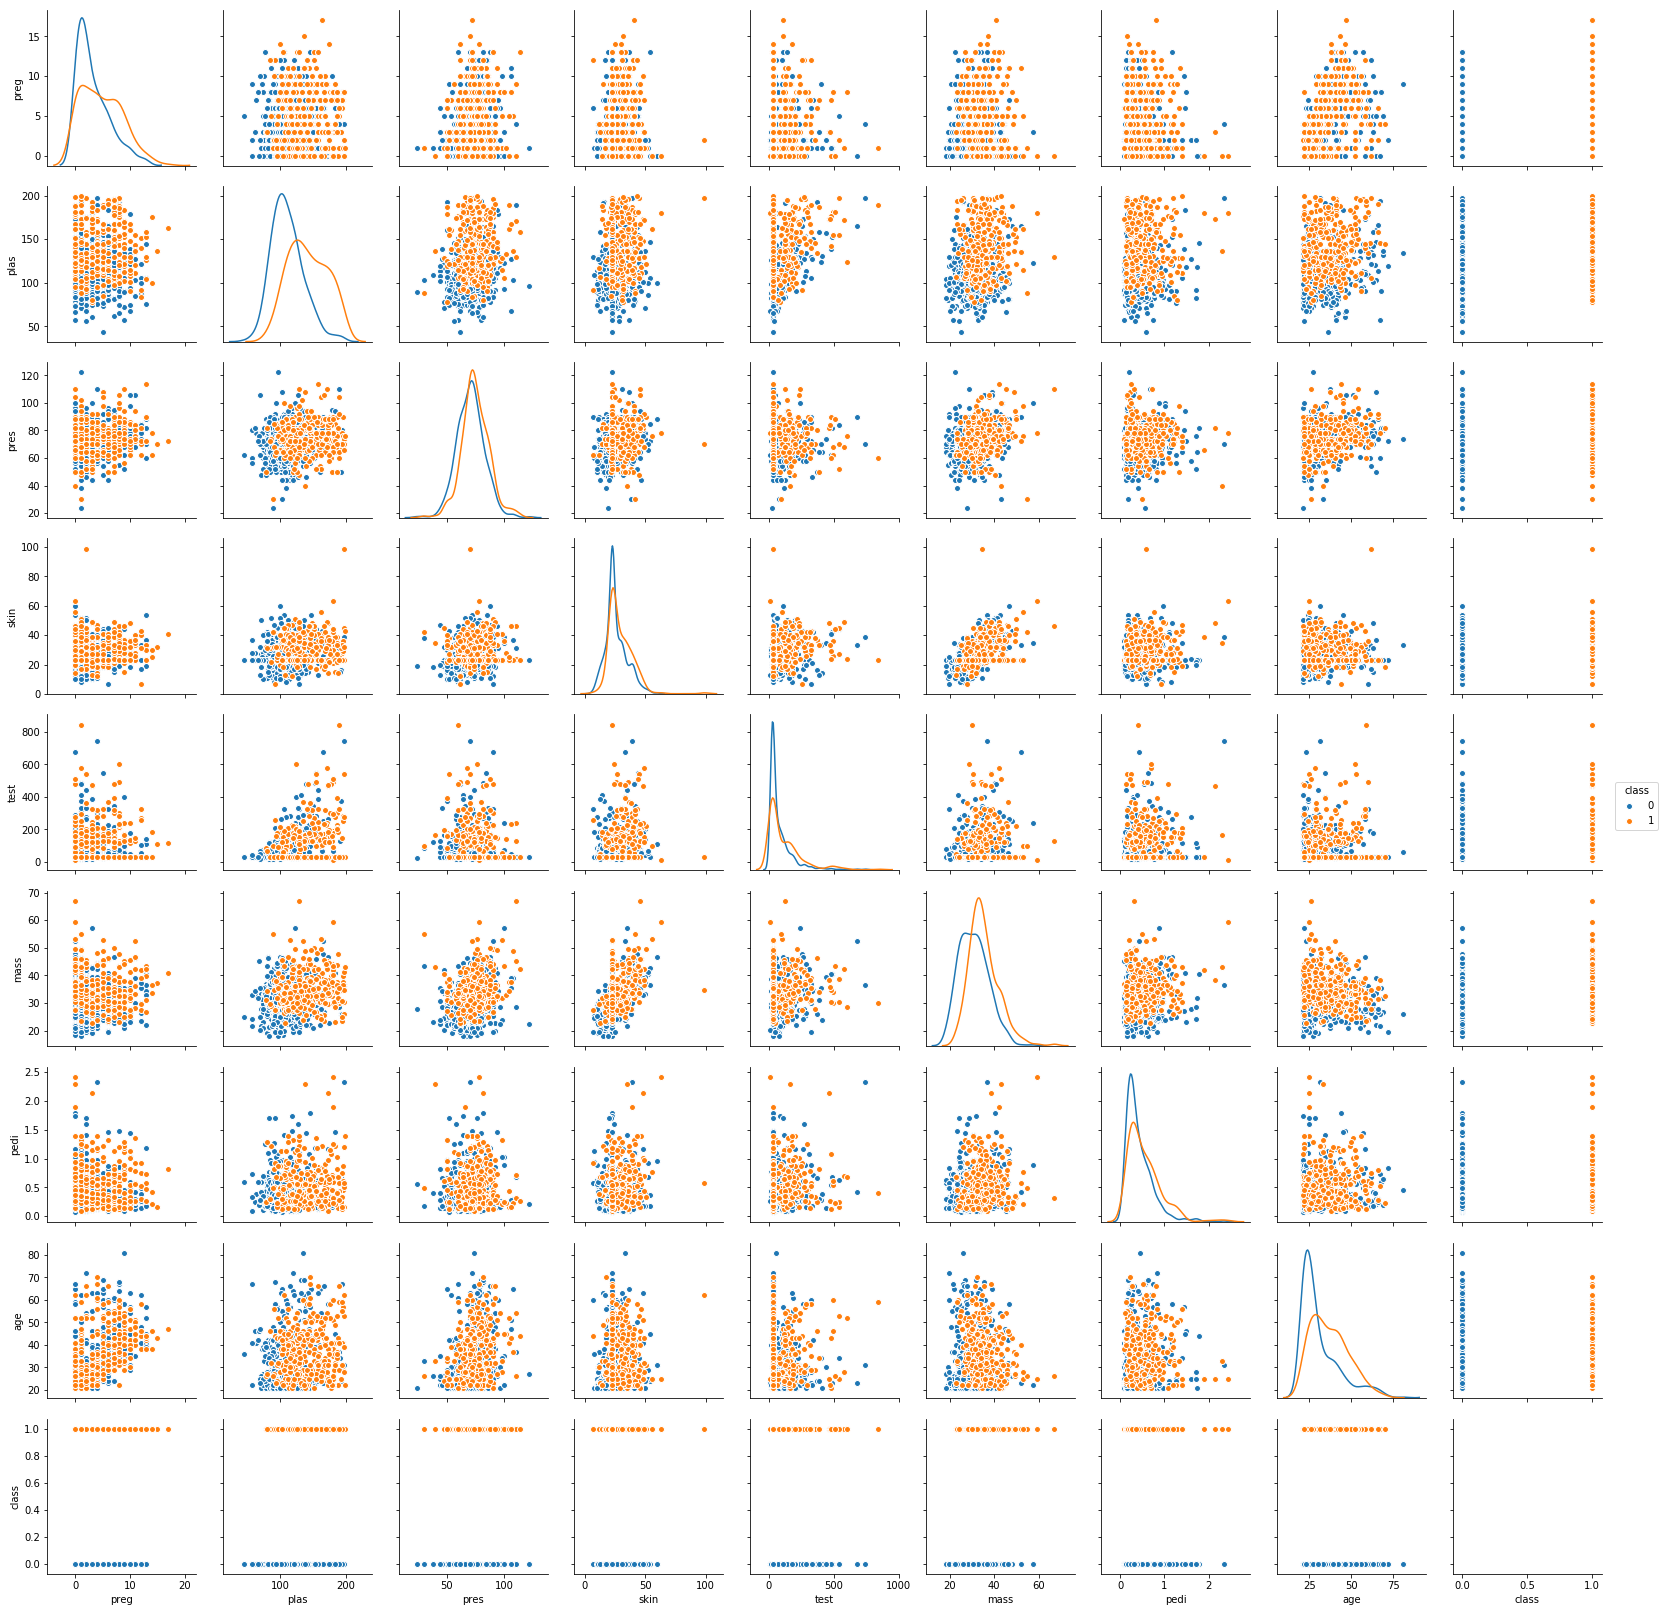

In [20]:
sns.pairplot(pima_df,hue='class',diag_kind='kde')

In [21]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [22]:
Y = pima_df['class']

In [23]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [24]:
X = pima_df[['preg','plas','pres','skin','test','mass','pedi','age']]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=100)
print('X_train - ',X_train.shape,'Y_train - ',Y_train.shape,'X_test - ',X_test.shape,'Y_test - ',Y_test.shape)

X_train -  (537, 8) Y_train -  (537,) X_test -  (231, 8) Y_test -  (231,)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [27]:
from sklearn import metrics
Y_predict = dtc.predict(X_test)
print(dtc.score(X_test, Y_test))
print(dtc.score(X_train, Y_train))
print(metrics.confusion_matrix(Y_test, Y_predict))

0.696969696969697
1.0
[[116  34]
 [ 36  45]]


In [28]:
train_char_label = {'No','Yes'}

Print the feature importance of the decision model - Optional

In [29]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree

from os import system

Pima_Tree_File = open('pima_tree.dot','w')
dot_data = tree.export_graphviz(dtc, out_file=Pima_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Pima_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtc.feature_importances_, columns = ["class"], index = X_train.columns))


         class
preg  0.074416
plas  0.286980
pres  0.067645
skin  0.083115
test  0.067152
mass  0.170830
pedi  0.082192
age   0.167670


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, Y_train)


In [31]:
y_rf_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , Y_test))
print(metrics.confusion_matrix(Y_test, y_rf_predict))

0.7402597402597403
[[123  27]
 [ 33  48]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [32]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=100)
abcl = abcl.fit(X_train, Y_train)



In [33]:
y_ab_predict = abcl.predict(X_test)
print(abcl.score(X_test , Y_test))

print(metrics.confusion_matrix(Y_test, y_ab_predict))

0.7012987012987013
[[116  34]
 [ 35  46]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [34]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100)

#bgcl = BaggingClassifier(n_estimators=50) ## DecisionTree, by default
bgcl = bgcl.fit(X_train, Y_train)

In [35]:
y_bc_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))

print(metrics.confusion_matrix(Y_test, y_bc_predict))

0.7229437229437229
[[121  29]
 [ 35  46]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100)
gbcl = gbcl.fit(X_train, Y_train)


In [37]:
y_gb_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , Y_test))
print(metrics.confusion_matrix(Y_test, y_gb_predict))

0.70995670995671
[[114  36]
 [ 31  50]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
vc = VotingClassifier(estimators=[('rf', rfcl),('gb',gbcl),('dt',dtc),('bc',bgcl),('ab',abcl)], voting ='hard')
vc.fit(X_train, Y_train)
vc.score(X_test,Y_test)

/Users/sesankaran/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7316017316017316

In [40]:
y_vc_predict = vc.predict(X_test)

/Users/sesankaran/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
metrics.confusion_matrix(Y_test,y_vc_predict)

array([[121,  29],
       [ 33,  48]])